In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install gensim

Original embeddings from Mikolov et al. are saved in C. To load them in python, we will make use of `gensim` library.

In [6]:
import gensim
PATH="/content/drive/Shareddrives/BISSIT 2021/Study materials - BISSIT 2021/Day 11 -  Natural Language Processing/GoogleNews-vectors-negative300.bin"
model = gensim.models.KeyedVectors.load_word2vec_format(PATH, binary=True) 

Gemsim wraps around some operations with word embeddings already

In [7]:
model["king"]

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [8]:
model.most_similar(positive=['king'])

[('kings', 0.7138046026229858),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864822864532471),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.543294370174408),
 ('throne', 0.5422104597091675)]

**Man** is to **king** as **woman** is to?

In [9]:
model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [10]:
model.most_similar(positive=['superman', 'woman'], negative=['man'])

[('superwoman', 0.529323935508728),
 ('Superwoman', 0.5192782282829285),
 ('superheroine', 0.5067673921585083),
 ('Superman', 0.4750259518623352),
 ('superhero', 0.47155308723449707),
 ('giantess', 0.4674377739429474),
 ('heroine', 0.45271992683410645),
 ('fairy_princess', 0.4500805139541626),
 ('reinvents_herself', 0.4483755826950073),
 ('sexpot', 0.4449748694896698)]

In [11]:
model.most_similar(positive=['burger', 'mexico'], negative=['us'])

[('burrito', 0.5523245334625244),
 ('taco', 0.5260846614837646),
 ('burgers', 0.5134128928184509),
 ('hamburger', 0.4964878559112549),
 ('chicken_sandwich', 0.4936162531375885),
 ('cheeseburger', 0.48256146907806396),
 ('fajita', 0.47919961810112),
 ('burritos', 0.4763544201850891),
 ('sandwich', 0.4687531590461731),
 ('chimichanga', 0.46813395619392395)]

How do we compute cosine similarity?


---

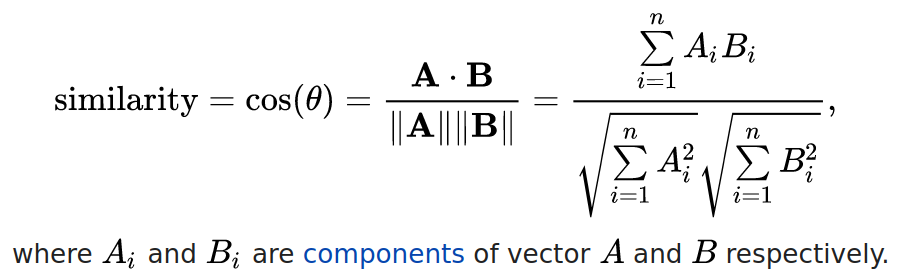


Note all vectors are normalized to unit distance already!


In [12]:
vectors = model.vectors_norm
indices = model.vocab

word="beer"

Get our vector matrix and word's index in the matrix

In [13]:
vectors.shape, indices.get(word).index

((3000000, 300), 3873)

In [14]:
word_index = indices.get(word).index
word_vector = vectors[word_index]

Check the vectors are normalized

In [15]:
import numpy as np
# L2 normalize vector
word_vector_len = (np.dot(word_vector, word_vector)**(-1/2))
normalized_word_vector = word_vector/word_vector_len
normalized_word_vector_len = (np.dot(normalized_word_vector, normalized_word_vector)**(-1/2))
print(f"Are vectors really normalized?\nWord vector length: {word_vector_len}\nNormalized word vector length: {normalized_word_vector_len}")

Are vectors really normalized?
Word vector length: 1.0000000298023237
Normalized word vector length: 1.0000000298023237


Lets find nearest neighbors

In [16]:
all_cosine_similarities = np.dot(vectors,word_vector)
all_cosine_similarities.shape

(3000000,)

In [17]:
def arg_topk(l, k):
  """
  Returns list of sorted indices  for top-k largest elements of the list l
  """
  ind = np.argpartition(l, -k)[-k:]
  return ind[np.argsort(l[ind])[::-1]]
  
K_nearest = 10
top_indices = arg_topk(all_cosine_similarities,K_nearest)
top_words = [ model.index2word[i] for i in top_indices.tolist()]
top_sims = all_cosine_similarities[top_indices]

In [18]:
for i,w,s in zip(top_indices, top_words, top_sims):
  print(f"word {w} ({i}), similarity: {s}")

word beer (3873), similarity: 0.9999998807907104
word beers (14732), similarity: 0.8409687876701355
word lager (46158), similarity: 0.7733745574951172
word Beer (14895), similarity: 0.71753990650177
word drinks (6099), similarity: 0.668931245803833
word lagers (121368), similarity: 0.6570086479187012
word Yuengling_Lager (1162101), similarity: 0.655455470085144
word microbrew (222734), similarity: 0.6534324884414673
word Brooklyn_Lager (844791), similarity: 0.6501551866531372
word suds (93546), similarity: 0.6497018337249756


In [19]:
model.most_similar(positive=['beer'])

[('beers', 0.8409687876701355),
 ('lager', 0.7733745574951172),
 ('Beer', 0.71753990650177),
 ('drinks', 0.668931245803833),
 ('lagers', 0.6570086479187012),
 ('Yuengling_Lager', 0.655455470085144),
 ('microbrew', 0.6534324884414673),
 ('Brooklyn_Lager', 0.6501551866531372),
 ('suds', 0.6497018337249756),
 ('brewed_beer', 0.6490240097045898)]